# Importing libraries I need for this Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df =  pd.read_csv('Ready Hotel data.csv')

In [3]:
df.head() #this data is not clean becuase all column that has to do with money has dollar sign next to it.
#the dollar signs make them strings. hence, Arithemetic calculations won't work on them. I need to change them to float or int.

,hotel,arrival_date_year,arrival_date_month,stays_in_week_nights,stays_in_weekend_nights,meal,Meal_cost,country,market_segment,daily_rate_per_night,required_car_parking_spaces,Revenue
0,City Hotel,2020,April,2,0,BB,$12.99,PRT,Aviation,$110.00,0,$571.56
1,City Hotel,2020,January,2,0,BB,$12.99,AUT,Aviation,$95.00,0,$493.62
2,City Hotel,2020,January,2,0,BB,$12.99,BEL,Aviation,$95.00,0,$493.62
3,City Hotel,2020,June,1,0,BB,$12.99,BEL,Aviation,$95.00,0,$246.81
4,City Hotel,2020,June,1,0,BB,$12.99,PRT,Aviation,$144.00,0,$374.11


# Data Cleaning

In [4]:
df.dtypes #from here, its obvious that the finance related columns are strings

hotel                          object
arrival_date_year               int64
arrival_date_month             object
stays_in_week_nights            int64
stays_in_weekend_nights         int64
meal                           object
Meal_cost                      object
country                        object
market_segment                 object
daily_rate_per_night           object
required_car_parking_spaces     int64
Revenue                        object
dtype: object

In [5]:
df['arrival_date_year'].unique() #this shows that this table is made of only three years

array([2020, 2019, 2018], dtype=int64)

In [6]:
df.isna().sum() #we can see from here that there are 203 null values in the country column.

hotel                            0
arrival_date_year                0
arrival_date_month               0
stays_in_week_nights             0
stays_in_weekend_nights          0
meal                             0
Meal_cost                        0
country                        203
market_segment                   0
daily_rate_per_night             0
required_car_parking_spaces      0
Revenue                          0
dtype: int64

In [7]:
df[df.country.isna()] #this reveals the null rows in the country column

,hotel,arrival_date_year,arrival_date_month,stays_in_week_nights,stays_in_weekend_nights,meal,Meal_cost,country,market_segment,daily_rate_per_night,required_car_parking_spaces,Revenue
356,City Hotel,2020,April,0,0,SC,$35.00,NaN,Complementary,$0.00,0,$0.00
395,Resort Hotel,2020,January,2,1,BB,$12.99,NaN,Complementary,$0.00,0,$0.00
1518,Resort Hotel,2018,December,2,0,BB,$12.99,NaN,Corporate,$35.00,0,$136.40
1519,Resort Hotel,2018,December,1,0,BB,$12.99,NaN,Corporate,$38.00,1,$74.04
1527,Resort Hotel,2018,December,1,0,BB,$12.99,NaN,Corporate,$35.00,0,$68.20
...,...,...,...,...,...,...,...,...,...,...,...,...
45951,Resort Hotel,2018,July,2,0,BB,$12.99,NaN,Online TA,$107.00,1,$833.96
46107,Resort Hotel,2020,February,1,2,HB,$17.99,NaN,Online TA,$130.00,0,"$2,104.83"
46339,Resort Hotel,2018,August,2,0,BB,$12.99,NaN,Online TA,$164.00,1,"$1,278.22"
46858,Resort Hotel,2018,August,10,3,BB,$12.99,NaN,Online TA,$134.00,0,"$6,788.57"


In [8]:
df['country'].fillna('Not Specified', inplace= True) #here I replaced the null values in the country column with not specified.

In [9]:
df[df['country'] == 'Not Specified'] # this reveals the columns.

,hotel,arrival_date_year,arrival_date_month,stays_in_week_nights,stays_in_weekend_nights,meal,Meal_cost,country,market_segment,daily_rate_per_night,required_car_parking_spaces,Revenue
356,City Hotel,2020,April,0,0,SC,$35.00,Not Specified,Complementary,$0.00,0,$0.00
395,Resort Hotel,2020,January,2,1,BB,$12.99,Not Specified,Complementary,$0.00,0,$0.00
1518,Resort Hotel,2018,December,2,0,BB,$12.99,Not Specified,Corporate,$35.00,0,$136.40
1519,Resort Hotel,2018,December,1,0,BB,$12.99,Not Specified,Corporate,$38.00,1,$74.04
1527,Resort Hotel,2018,December,1,0,BB,$12.99,Not Specified,Corporate,$35.00,0,$68.20
...,...,...,...,...,...,...,...,...,...,...,...,...
45951,Resort Hotel,2018,July,2,0,BB,$12.99,Not Specified,Online TA,$107.00,1,$833.96
46107,Resort Hotel,2020,February,1,2,HB,$17.99,Not Specified,Online TA,$130.00,0,"$2,104.83"
46339,Resort Hotel,2018,August,2,0,BB,$12.99,Not Specified,Online TA,$164.00,1,"$1,278.22"
46858,Resort Hotel,2018,August,10,3,BB,$12.99,Not Specified,Online TA,$134.00,0,"$6,788.57"


In [10]:
df['market_segment'].unique() #this shows all the unique values in the market segment.

array(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA', 'Undefined'], dtype=object)

In [11]:
df.dtypes

hotel                          object
arrival_date_year               int64
arrival_date_month             object
stays_in_week_nights            int64
stays_in_weekend_nights         int64
meal                           object
Meal_cost                      object
country                        object
market_segment                 object
daily_rate_per_night           object
required_car_parking_spaces     int64
Revenue                        object
dtype: object

In [12]:
df['Revenue'][0].split('$')[1] #Just testing this code if it would work out.

'571.56 '

In [13]:
df['revenue']= df['Revenue'].apply(lambda x: x.split('$')[1]) #Here, I tried to remove the $ sign in the Revenue column.
# Afterwards, I put everything in a new column

In [14]:
df['Daily_rate_per_night'] = df['daily_rate_per_night'].apply(lambda x: x.split('$')[1])
#I removed every dollar sign for the daily_rate column

In [15]:
df['meal_cost'] = df['Meal_cost'].apply(lambda x: x.split('$')[1]) #removed I removed the dollar sign for the meal cost column. 

In [16]:
#Let me drop two tables at a time
df.drop(['daily_rate_per_night', 'Revenue','Meal_cost'], axis= 1, inplace= True)

In [17]:
#some data are not not in their right data type. let me change them.
df['arrival_date_year'] = df['arrival_date_year'].astype(str)

In [18]:
df.dtypes

hotel                          object
arrival_date_year              object
arrival_date_month             object
stays_in_week_nights            int64
stays_in_weekend_nights         int64
meal                           object
country                        object
market_segment                 object
required_car_parking_spaces     int64
revenue                        object
Daily_rate_per_night           object
meal_cost                      object
dtype: object

In [19]:
#daily rate per night and revenue are as strings, let me convert them to float.
df['revenue','Daily_rate_parking_spaces']= df['revenue', 'Daily_rate_parking_spaces'].apply(pd.to_numeric)
#if I was dealing with one column, df['revenue'] = pd.to_numeric(['revenue']) would have worked

KeyError: ('revenue', 'Daily_rate_parking_spaces')

In [20]:
df.loc[12258] #The error message I got earlier showed the a bracket in row 12258 has a bracket and that was why I couldn't convert to float data.
#so I decided to check here.

hotel                          Resort Hotel
arrival_date_year                      2020
arrival_date_month                    March
stays_in_week_nights                      6
stays_in_weekend_nights                   4
meal                                     BB
country                                 GBR
market_segment                       Groups
required_car_parking_spaces               0
revenue                              82.88)
Daily_rate_per_night                  6.38)
meal_cost                            12.99 
Name: 12258, dtype: object

In [21]:
df[df['revenue'].str.contains('\)')]
#Alternatively you can use df[df['revenue'].str.contains(')'), regex = False]. regex by default is True.
#so now I have spotted why I couldn't convert the columns to string. which is because of the incomplete parenthesis.
#this was indicated by the error message I had earlier

,hotel,arrival_date_year,arrival_date_month,stays_in_week_nights,stays_in_weekend_nights,meal,country,market_segment,required_car_parking_spaces,revenue,Daily_rate_per_night,meal_cost
12258,Resort Hotel,2020,March,6,4,BB,GBR,Groups,0,82.88),6.38),12.99


In [22]:
#To get rid of the parenthesis with replace.
df['revenue']= df['revenue'].str.replace(')', '')

C:\Users\user\AppData\Local\Temp\ipykernel_48404\835728886.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['revenue']= df['revenue'].str.replace(')', '')


In [23]:
df[df['revenue'].str.contains('\)')] #we can now see that there is no value containin the close parenthesis ')' in the revenue column

,hotel,arrival_date_year,arrival_date_month,stays_in_week_nights,stays_in_weekend_nights,meal,country,market_segment,required_car_parking_spaces,revenue,Daily_rate_per_night,meal_cost


In [24]:
# Lets also get rid of the ')' in the daily rate per night
df['Daily_rate_per_night']= df['Daily_rate_per_night'].str.replace(')', '')

C:\Users\user\AppData\Local\Temp\ipykernel_48404\2384736266.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Daily_rate_per_night']= df['Daily_rate_per_night'].str.replace(')', '')


In [25]:
df[df['Daily_rate_per_night'].str.contains('\)')] # the close parenthesis is gone.

,hotel,arrival_date_year,arrival_date_month,stays_in_week_nights,stays_in_weekend_nights,meal,country,market_segment,required_car_parking_spaces,revenue,Daily_rate_per_night,meal_cost


In [26]:
#lets now change the data type for the two columns 
df['revenue']= df['revenue'].apply(pd.to_numeric) #the error here showed that some values are having ',' so they can't be changed to string.

ValueError: Unable to parse string "1,122.34 " at position 0

In [27]:
df[df['revenue'].str.contains('\,')] #this code reveals all rows containing digits with ','

,hotel,arrival_date_year,arrival_date_month,stays_in_week_nights,stays_in_weekend_nights,meal,country,market_segment,required_car_parking_spaces,revenue,Daily_rate_per_night,meal_cost
5,City Hotel,2020,June,3,0,BB,PRT,Aviation,0,"1,122.34",144.00,12.99
22,City Hotel,2020,June,3,2,BB,PRT,Aviation,0,"1,428.90",110.00,12.99
26,City Hotel,2020,March,10,4,BB,ITA,Aviation,0,"3,455.34",95.00,12.99
30,City Hotel,2020,January,3,2,BB,PRT,Aviation,0,"1,026.21",79.00,12.99
31,City Hotel,2020,June,10,4,BB,GRC,Aviation,0,"4,000.92",110.00,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...
53155,Resort Hotel,2020,April,3,1,BB,PRT,Online TA,0,"3,054.94",195.98,12.99
53157,Resort Hotel,2020,July,2,2,BB,CHE,Online TA,0,"2,805.84",180.00,12.99
53158,Resort Hotel,2020,August,10,4,BB,PRT,Online TA,0,"24,551.10",450.00,12.99
53161,Resort Hotel,2019,October,15,6,BB,PRT,Online TA,0,"4,271.89",52.20,12.99


In [28]:
len(df[df['revenue'].str.contains(',')]) #They are 30850 in number

30850

In [29]:
df['revenue']= df['revenue'].str.replace(',', '') #with this code, I removed the comma.

In [30]:
len(df[df['revenue'].str.contains(',')]) #they have been replaced successfully

0

In [31]:
df[df['Daily_rate_per_night'].str.contains(',')] # this code revealed that there is a row that contains a ',' in daily rate.

,hotel,arrival_date_year,arrival_date_month,stays_in_week_nights,stays_in_weekend_nights,meal,country,market_segment,required_car_parking_spaces,revenue,Daily_rate_per_night,meal_cost
15932,City Hotel,2019,March,1,0,BB,PRT,Offline TA/TO,0,21043.80,"5,400.00",12.99


In [32]:
len(df[df['Daily_rate_per_night'].str.contains(',')]) #this just shows it is just one row

1

In [33]:
df['Daily_rate_per_night']= df['Daily_rate_per_night'].str.replace(',', '') #this code removes the ','

In [35]:
df['revenue']= df['revenue'].apply(pd.to_numeric) #so I have finally changed to our desired data type.

In [36]:
df['Daily_rate_per_night']= df['Daily_rate_per_night'].apply(pd.to_numeric) #so we finally changed to our desired data type.

In [37]:
df['meal_cost'] = df['meal_cost'].apply(pd.to_numeric) #this change the meal cost column to numeric

In [38]:
df.dtypes #this checked the data type of every column and they are perfect as I want.

hotel                           object
arrival_date_year               object
arrival_date_month              object
stays_in_week_nights             int64
stays_in_weekend_nights          int64
meal                            object
country                         object
market_segment                  object
required_car_parking_spaces      int64
revenue                        float64
Daily_rate_per_night           float64
meal_cost                      float64
dtype: object

In [39]:
# I do not like the fact that revenue is comming before daily_rate_per_night. let me change reposition my columns befor visualization.
df = df[['hotel', 'arrival_date_year', 'arrival_date_month','country', 'stays_in_week_nights','stays_in_weekend_nights','Daily_rate_per_night', 'required_car_parking_spaces','meal', 'meal_cost', 'market_segment', 'revenue']]

In [40]:
df.head(3)

,hotel,arrival_date_year,arrival_date_month,country,stays_in_week_nights,stays_in_weekend_nights,Daily_rate_per_night,required_car_parking_spaces,meal,meal_cost,market_segment,revenue
0,City Hotel,2020,April,PRT,2,0,110.0,0,BB,12.99,Aviation,571.56
1,City Hotel,2020,January,AUT,2,0,95.0,0,BB,12.99,Aviation,493.62
2,City Hotel,2020,January,BEL,2,0,95.0,0,BB,12.99,Aviation,493.62


#### I would have tried to drop duplicates but the table we have here does not have any unique column. something like Order ID, so removing duplicate may not make sense because two people from the same country can come in on the same day, month, year, in the same hotel and order the same food type.

## Visualization and Analysis.

In [41]:
group_year = df.groupby('arrival_date_year').agg({'revenue':'sum'})

In [42]:
group_year = group_year.sort_values('revenue',ascending=False).reset_index()

In [43]:
group_year

,arrival_date_year,revenue
0,2020,61683918.83
1,2018,17728779.81
2,2019,15961179.06


This simply shows that the hotel made more money in 2020 and the least was in 2019

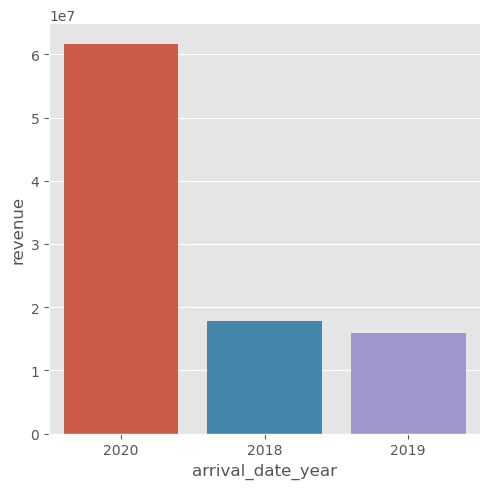

In [68]:
plt.style.use('ggplot')
sns.catplot(x= 'arrival_date_year', y = 'revenue', data = group_year, kind = 'bar')


This chart has proven that truly the hotel had more money in 2020 than any other year, with the least revenue coming in 2019

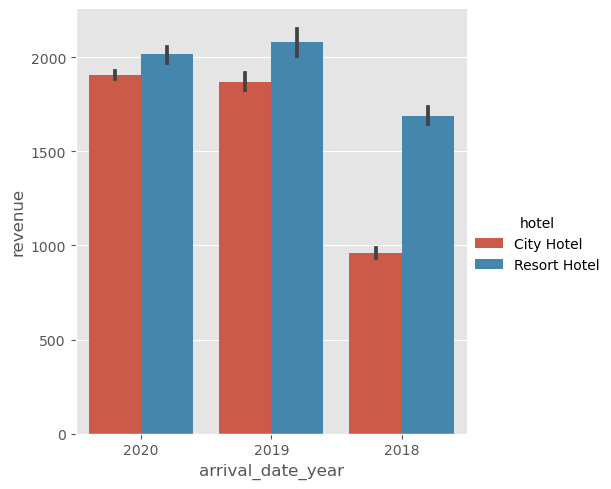

In [69]:
sns.catplot(x = 'arrival_date_year', y= 'revenue', data = df, kind = 'bar', hue = 'hotel' )

In [46]:
# I could check for how much the company have generated from each meal.
df['Meal_Revenue'] = df['meal_cost'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
#so here I created a new column to contain revenue generated from food.

C:\Users\user\AppData\Local\Temp\ipykernel_48404\436747549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meal_Revenue'] = df['meal_cost'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])


In [48]:
df.head(3)

,hotel,arrival_date_year,arrival_date_month,country,stays_in_week_nights,stays_in_weekend_nights,Daily_rate_per_night,required_car_parking_spaces,meal,meal_cost,market_segment,revenue,Meal_Revenue
0,City Hotel,2020,April,PRT,2,0,110.0,0,BB,12.99,Aviation,571.56,25.98
1,City Hotel,2020,January,AUT,2,0,95.0,0,BB,12.99,Aviation,493.62,25.98
2,City Hotel,2020,January,BEL,2,0,95.0,0,BB,12.99,Aviation,493.62,25.98


In [50]:
df_Meal_grouped = df.groupby(['arrival_date_year', 'meal']).agg({'Meal_Revenue':'sum'})

In [51]:
df_Meal_grouped

Meal_Revenue
arrival_date_year meal                   
2018              BB            511000.62
                  FB             12886.14
                  HB            163277.24
                  SC             42385.00
                  Undefined          0.00
2019              BB            331972.44
                  FB              4134.12
                  HB             66491.04
                  SC            102760.00
                  Undefined          0.00
2020              BB           1082365.77
                  FB             10951.02
                  HB            338895.62
                  SC            494305.00
                  Undefined          0.00

In [52]:
df_Meal_grouped = df_Meal_grouped.reset_index()

In [53]:
df_Meal_grouped

,arrival_date_year,meal,Meal_Revenue
0,2018,BB,511000.62
1,2018,FB,12886.14
2,2018,HB,163277.24
3,2018,SC,42385.00
4,2018,Undefined,0.00
5,2019,BB,331972.44
6,2019,FB,4134.12
7,2019,HB,66491.04
8,2019,SC,102760.00
9,2019,Undefined,0.00


In [58]:
#From the data we have, the undefined value is zero, so I need to remove. 
#them because it appeared those individuals didn't get food from the hotel but outside.
df_Meal_grouped.drop(df_Meal_grouped[df_Meal_grouped['meal'] == 'Undefined'].index, inplace= True)

In [59]:
df_Meal_grouped

,arrival_date_year,meal,Meal_Revenue
0,2018,BB,511000.62
1,2018,FB,12886.14
2,2018,HB,163277.24
3,2018,SC,42385.00
5,2019,BB,331972.44
6,2019,FB,4134.12
7,2019,HB,66491.04
8,2019,SC,102760.00
10,2020,BB,1082365.77
11,2020,FB,10951.02


Text(0.5, 1.0, 'Average Meal for each year')

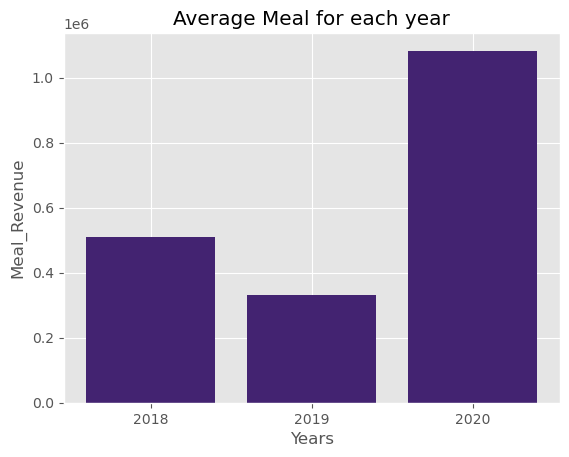

In [74]:
fig, ax = plt.subplots()
ax.bar(df_Meal_grouped['arrival_date_year'], df_Meal_grouped['Meal_Revenue'], color= '#432371')
plt.xlabel('Years')
plt.ylabel('Meal_Revenue')
plt.title('Average Meal for each year')

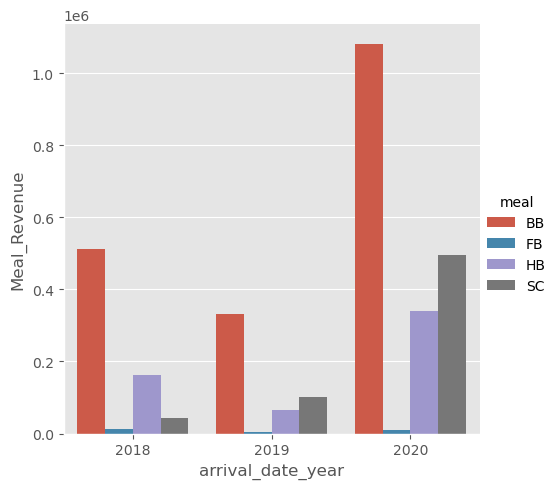

In [71]:
g= sns.catplot(x= 'arrival_date_year', y = 'Meal_Revenue', data = df_Meal_grouped, hue = 'meal', kind= 'bar')
g.set_titles('Revenue from meal for each year for each meal type')